# Calculating Why Customers Churn 

 <tr>
    <td> <img src="pexels-lukas-590020.jpg"/> </td>
    <td> <img src="pexels-burak-kebapci-187041.jpg"/> </td>
    </tr>

[Source Photo 1](https://www.pexels.com/photo/person-holding-pen-pointing-at-graph-590020/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) 
[Source Photo 2](https://www.pexels.com/photo/space-grey-ipad-air-with-graph-on-brown-wooden-table-187041/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) 

We will begin with the necessary imports we will need for this project.

In [41]:
##General imports we need for the project
import pandas as pd
import os
import env
import warnings
warnings.filterwarnings('ignore')
import numpy

##Imports for graphing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

##Import prep and acquire functions
from acquire import get_telco_data
from prepare import prep_telco

##Import sklearn functinos
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

##Import sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

##Import sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Import statistics functinos
import scipy.stats as stats
from scipy.stats import mannwhitneyu

##Custom code so that we can print out tables side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

## Project planning


 - We will created a `README.md` with a data dictionary, project goals. We also established our initial hypotheses in this `README.md` file.
 
 - Acquire data using the function `get_telco_data`. This function will be saved to the `acquire.py` file, which we imported to this notebook above.
 
 - We will clean and prepare the data using the function `prep_telco`. This function will be saved to the `prepare.py` file, which we imported to this notebook above.
 
 - Clearly define several hypotheses and an $\alpha$ value. We will run statistical tests on these hypotheses, then determine whether or not to reject the null hypothesis. We will documents our findings in each case.  
 
 - Establish and document a baseline accuracy. 
 
 - Train classification modules. We will evaluate these models on our train and validate datasets. 
      - We will compare the accuracy of these models to the baseline accuracy. 

 - We will choose the model that performs the best and try that model on the test dataset once. 
 
 - Create a CSV file with `customer_id`, probability of churn, and prediction of churn, based on the results of our best performing model. 
 
 - Finish with key takeaways, recommendations, and next steps.

## Execute Summary

 - I created three models `DecisionTree`, `RandomForest`, and `KNeighbors`. 
 
 - I found that the `RandomForest` with `max_depth=10` and `min_samples_leaf=1` model performed with a high accuracy, while still maintaining a high recall score.  I concluded that the recall score was most important because we want to capture all customers who churn. Overestimating churn rate is better than underestimating churn rate. Furthermore, this model outperformed our baseline accuracy of $0.73$, so it has value.
 
**Policy recommendation**
 - We know that the customers most likely to churn are customers on a month-to-month contract. 
     - Our `DecisionTree` model indicated that among customers on a month-to-month contract, the biggest predictors of churn are having `monthly_charges` less than \$68.42 or having tenure of 5 months or less. Thus, I recommend limiting the month-to-month contract option to customers who satisfy one of the following criteria:
         - At least &#0036;68.42 in monthly charges. 
         - At least six months of tenure.
         
         
**Recommendation for further exploration**
 - With more time I would like to explore the relationship between the churn and the following variables: `contract_type_id`, `tenure`, `monthly_charges`, and `payment_type_id`.

## Acquire data

Now we will acquire the necessary data we will need for this project. We will utilize a function called `get_telco_data` from our `acquire.py` file. For more information about the `get_telco_data` function, please refer to the mentioned `acquire.py` file.

In [42]:
df = get_telco_data()

In [43]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,No,3,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


### Get info

Let's get info for each column in our dataframe.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

Let's also get the shape for our DataFrame.

In [45]:
df.shape

(7043, 24)

### Describe data

Now we will describe key statistics for our DataFrame.

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Value counts of data

No we will run a loop to get value counts for each column.

In [47]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customer_id ---
2519-TWKFS    1
1832-PEUTS    1
4878-BUNFV    1
2685-SREOM    1
2525-GVKQU    1
             ..
8430-TWCBX    1
3217-FZDMN    1
3200-MNQTF    1
1810-MVMAI    1
9337-SRRNI    1
Name: customer_id, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- senior_citizen ---
0    5901
1    1142
Name: senior_citizen, dtype: int64
---- partner ---
No     3641
Yes    3402
Name: partner, dtype: int64
---- dependents ---
No     4933
Yes    2110
Name: dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---- phone_service ---
Yes    6361
No      682
Name: phone_service, dtype: int64
---- multiple_lines ---
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
---- internet_service_type_id ---
2    3096
1    2421
3    1526
Name: internet_se

### Distributions of individual variables

#### Gender

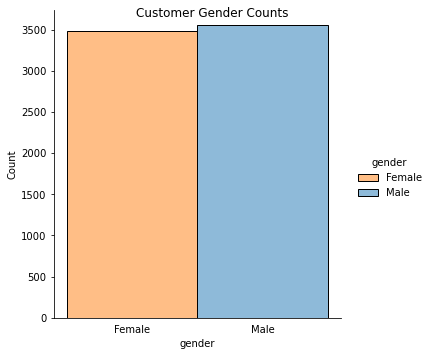

In [48]:
#Graph gender counts
gender_distribution = sns.displot(df, x = df.gender, discrete = True, hue = "gender", palette=["C1", "C0"])
#Set title
title = gender_distribution.fig.suptitle('Customer Gender Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Senior Citizen

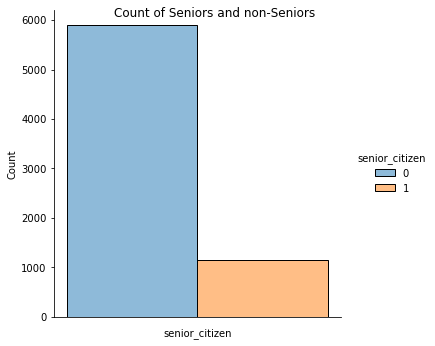

In [49]:
#Graph count of senior and non-senior
senior_distribution = sns.displot(df, x = df.senior_citizen, discrete = True, hue = "senior_citizen")
#Set title
title = senior_distribution.fig.suptitle('Count of Seniors and non-Seniors')
#Remove tick labels
senior_distribution.set(xticklabels=[])  
#Remove ticks
plt.tick_params(bottom=False) 

#### Partner

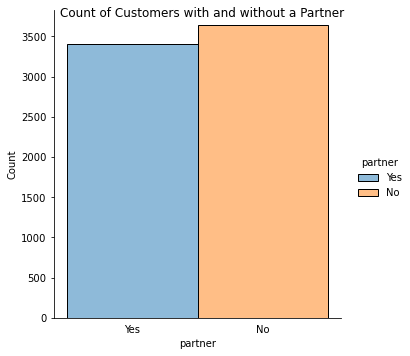

In [50]:
#Graph counts of customers with and without partners
partner_distribution = sns.displot(df, x = df.partner, discrete = True, hue = "partner")
#Set title
title = partner_distribution.fig.suptitle('Count of Customers with and without a Partner')
#Remove ticks
plt.tick_params(bottom=False) 

#### Dependents

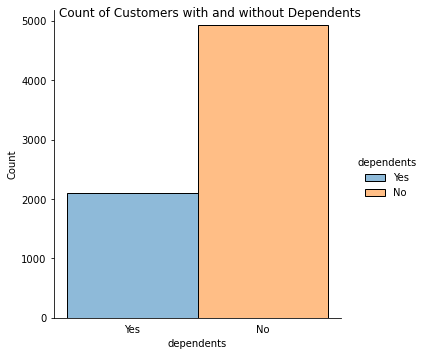

In [51]:
#Graph count of customers with and without dependents
dependents_distribution = sns.displot(df, x = df.dependents, discrete = True, hue = "dependents")
#Set title
title = dependents_distribution.fig.suptitle('Count of Customers with and without Dependents')
#Remove ticks
plt.tick_params(bottom=False) 

#### Tenure

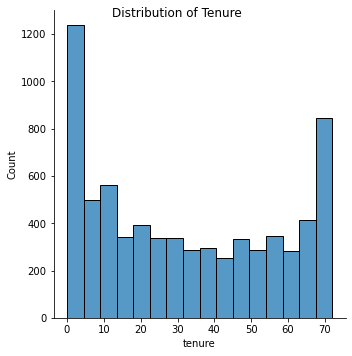

In [52]:
#Graph tenure distribution
tenure_distribution = sns.displot(df, x="tenure")
#Set title
title = tenure_distribution.fig.suptitle('Distribution of Tenure')

#### Phone Service

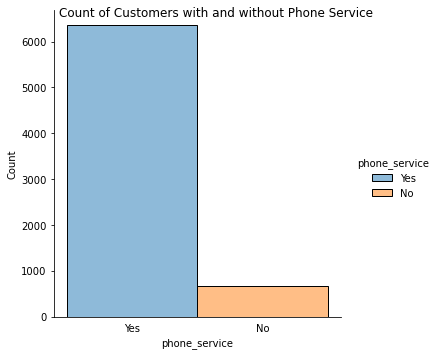

In [53]:
#Graph distributino of phone service
phone_service_distribution = sns.displot(df, x = df.phone_service, discrete = True, hue = "phone_service")
#Set title
title = phone_service_distribution.fig.suptitle('Count of Customers with and without Phone Service')
#Remove ticks
plt.tick_params(bottom=False) 

#### Multiple Lines

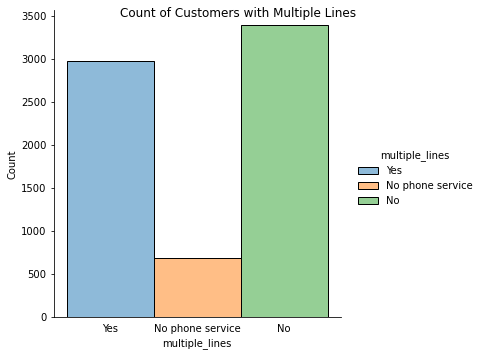

In [54]:
#Graph of customers with multiple lines
multiple_lines_distribution = sns.displot(df, x = df.multiple_lines, discrete = True, hue = "multiple_lines")
#Set title
title = multiple_lines_distribution.fig.suptitle('Count of Customers with Multiple Lines')
#Remove ticks
plt.tick_params(bottom=False) 

#### Internet Service ID

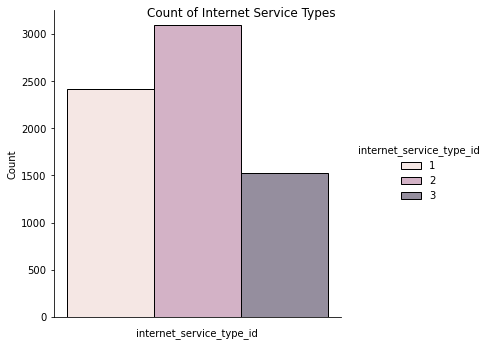

In [55]:
#Graph counts of internet_service_type_id
internet_service_type_id_distribution = sns.displot(df, x = df.internet_service_type_id, discrete = True, hue = "internet_service_type_id")
#Set title
title = internet_service_type_id_distribution.fig.suptitle('Count of Internet Service Types')
#Remove tick labels
internet_service_type_id_distribution.set(xticklabels=[""])  
#Remove ticks
plt.tick_params(bottom=False) 

#### Online Security

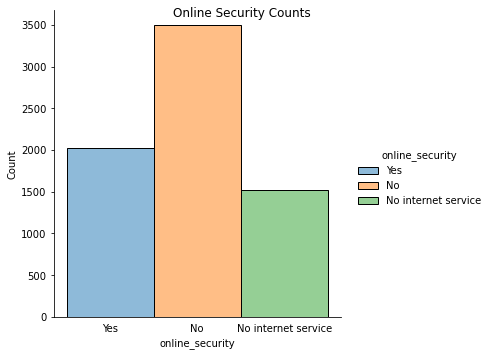

In [56]:
#Graph counts of online security
online_security_distribution = sns.displot(df, x = df.online_security, discrete = True, hue = "online_security")
#Set title
title = online_security_distribution.fig.suptitle('Online Security Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Online Backup

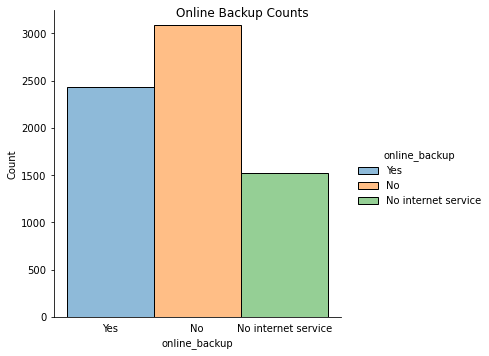

In [57]:
#Graph of online backup counts
online_backup_distribution = sns.displot(df, x = df.online_backup, discrete = True, hue = "online_backup")
#Set title
title = online_backup_distribution.fig.suptitle('Online Backup Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Device Protection

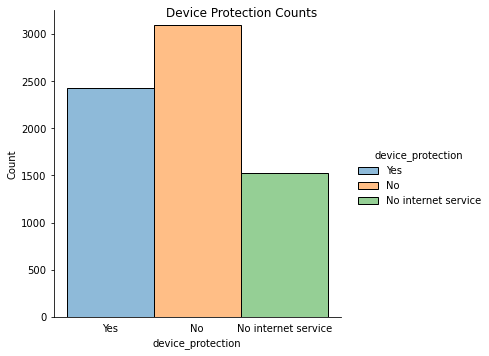

In [58]:
#Graph device protection counts
device_protection_distribution = sns.displot(df, x = df.device_protection, discrete = True, hue = "device_protection")
#Set title
title = device_protection_distribution.fig.suptitle('Device Protection Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Tech Support

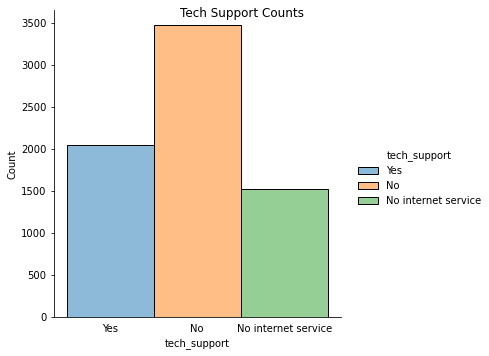

In [59]:
#Tech Support Counts
tech_support_distribution = sns.displot(df, x = df.tech_support, discrete = True, hue = "tech_support")
#Set title
title = tech_support_distribution.fig.suptitle('Tech Support Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Streaming TV 

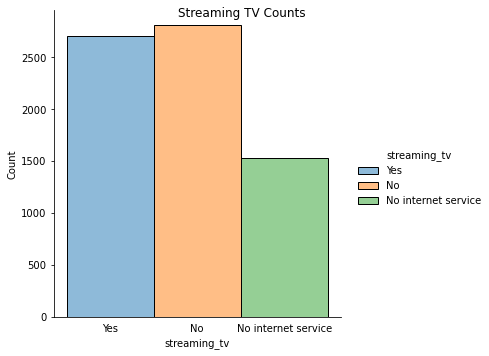

In [60]:
#Graph streaming TV distribution
streaming_tv_distribution = sns.displot(df, x = df.streaming_tv, discrete = True, hue = "streaming_tv")
#Set title
title = streaming_tv_distribution.fig.suptitle('Streaming TV Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Streaming Movies

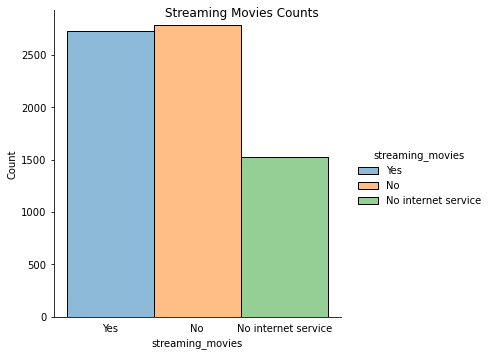

In [61]:
#Graph streaming movies counts
streaming_movies_distribution = sns.displot(df, x = df.streaming_movies, discrete = True, hue = "streaming_movies")
#Set title
title = streaming_movies_distribution.fig.suptitle('Streaming Movies Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Contract Type ID

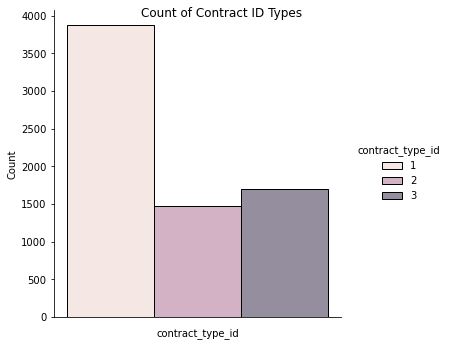

In [62]:
#Graph Contract Type ID counts
contract_type_id_distribution = sns.displot(df, x = df.contract_type_id, discrete = True, hue = "contract_type_id")
#Set title
title = contract_type_id_distribution.fig.suptitle('Count of Contract ID Types')
#Remove tick labels
contract_type_id_distribution.set(xticklabels=[])  
#Remove ticks
plt.tick_params(bottom=False) 

#### Paperless Billing

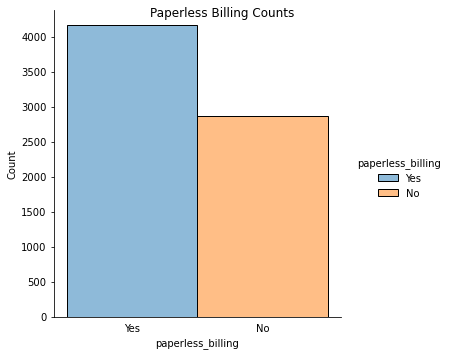

In [63]:
#Graph paperless billing counts
paperless_billing_distribution = sns.displot(df, x = df.paperless_billing, discrete = True, hue = "paperless_billing")
#Set title
title = paperless_billing_distribution.fig.suptitle('Paperless Billing Counts')
#Remove ticks
plt.tick_params(bottom=False) 

#### Payment Type ID

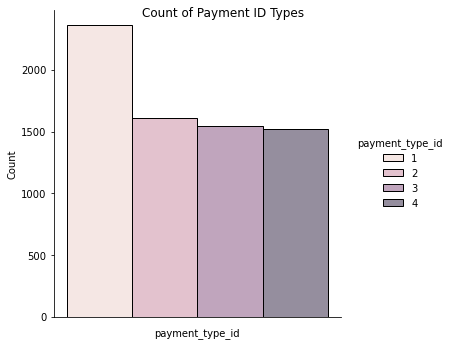

In [64]:
#Graph payment type ID counts
payment_type_id_distribution = sns.displot(df, x = df.payment_type_id, discrete = True, hue = "payment_type_id")
#Set title
title = payment_type_id_distribution.fig.suptitle('Count of Payment ID Types')
#Remove tick labels
payment_type_id_distribution.set(xticklabels=[])  
#Remove ticks
plt.tick_params(bottom=False) 

#### Monthly Charges

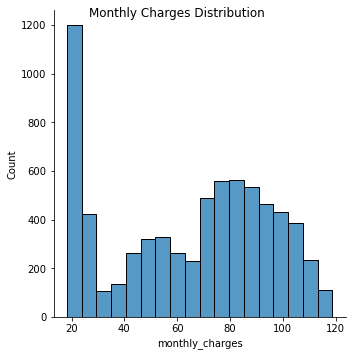

In [65]:
#Graph monthly charges distribution
monthly_charges_distribution = sns.displot(df, x='monthly_charges')
#Set title
title = monthly_charges_distribution.fig.suptitle('Monthly Charges Distribution')

#### Total charges

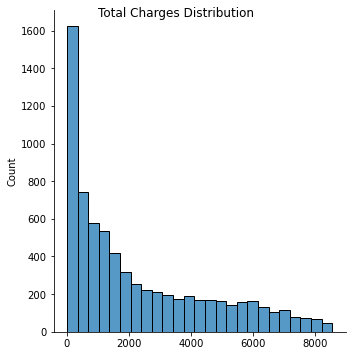

In [66]:
#Graph total charges distribution 
#We cannot use `total_charges` because this column has null values and we have not clean this column yet.
#monthly_charges * tenure will give us a value equivalent to total_charges
total_charges_distribution = sns.displot(df, x= df.monthly_charges * df.tenure)
#Set title
title = total_charges_distribution.fig.suptitle('Total Charges Distribution')

#### Churn

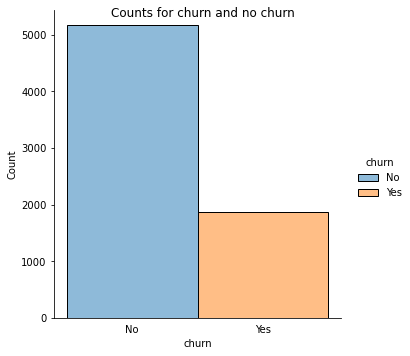

In [67]:
#Plot churn counts
churn_distribution = sns.displot(df, x = df.churn, discrete = True, hue = "churn")
#Set title
title = churn_distribution.fig.suptitle('Counts for churn and no churn')
#Remove ticks
plt.tick_params(bottom=False) 

#### Contract Type

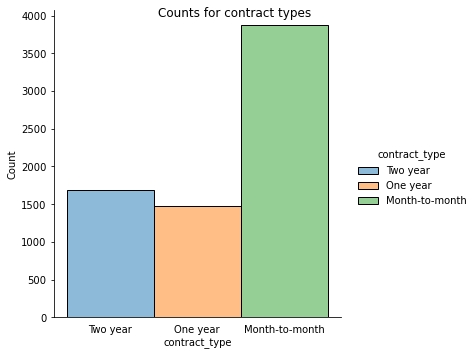

In [68]:
#Graph contract type counts
contract_type_distribution = sns.displot(df, x = df.contract_type, discrete = True, hue = "contract_type")
#Set title
title = contract_type_distribution.fig.suptitle('Counts for contract types')
#Remove ticks
plt.tick_params(bottom=False) 

#### Internet Service Type

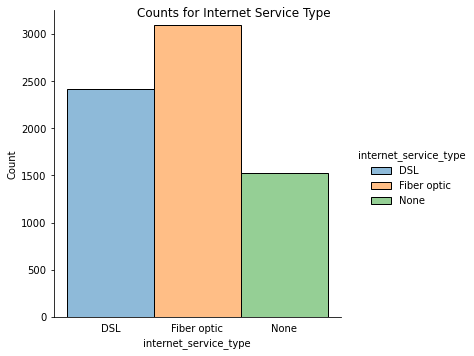

In [69]:
#Graph internet service type counts
internet_service_type_distribution = sns.displot(df, x = df.internet_service_type, discrete = True, hue = "internet_service_type")
#Set title
title = internet_service_type_distribution.fig.suptitle('Counts for Internet Service Type')
#Remove ticks
plt.tick_params(bottom=False) 

#### Payment Type

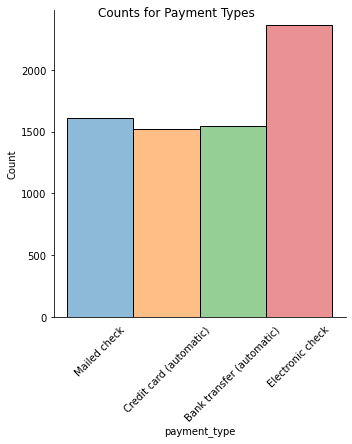

In [70]:
#Graph counts of Payment Type
payment_type_distribution = sns.displot(df, x = df.payment_type, discrete = True, hue = "payment_type", legend = False)
#Rotate the labels of each bar 
#We rotate the labels because the overlap if they are straight.
rotate_labels = payment_type_distribution.set_xticklabels(rotation=45)
#Remove ticks
plt.tick_params(bottom=False) 
#Set title
title = payment_type_distribution.fig.suptitle('Counts for Payment Types')

### Acquire takeaways

 - I wrote a function containing SQL query to obtain my DataFrame of Telco data.
 - I used `info()`, `shape`, `describe()`, and `value_counts()` on this DataFrame.
 - I utilized Seaborn to build distribution graphs for the features of this DataFrame.

## Data Preparation

Now we will clean the data we need for this project. We will use a function called `prep_telco` from the file `prepare.py`. The `prep_telco` function will also split our data into `train`, `validate`, and `test` datasets.

For more information about the function `prep_telco`, please see the file `prepare.py` in this repository.

We did not discover any outliers in the data. The only column with missing values was the `total_charges` column. In this case a lack of values indicates `0` total charges, so empty values were replaced with `0`.

In [71]:
train, validate, test = prep_telco(df)

In [72]:
print("Shape of train data:", train.shape)
print("Shape of validate data:", validate.shape)
print("Shape of test data:", test.shape)

Shape of train data: (3943, 28)
Shape of validate data: (1691, 28)
Shape of test data: (1409, 28)


### Prepare takeaways

 - I wrote a two functions in the `prepare.py` file. This file contains two functions: `split_data` and `get_telco`.
 - The `split data` divides the `df` DataFrame into `train`, `validate`, and `test`, stratifying the data on the `has_churned`.
 - The `get_telco` function performs the following tasks:
     - Eliminate duplicate columns.
     - Create columns `has_churned` and `paperless_billing_numeric`.
     - Create dummy variables for non-numeric columns. 
     - Concatenate dummy variables to `df`.
     - Drop redundant columns in `df`.
     - Replace null variables in `total_charges` with $0$.
     - Convert `total_charges` and `monthly_charges` values into floats. 
     - Call the `split_data` function to split the data into `train`, `validate`, and `test`, stratifying on the `has_churned` column.

## Explore Data

`In this section, we will run statistical tests to determine what variables are likely correlated with churn.

For the statistical hypothesis testing in this section we will use the following value for alpha ($\alpha$):

In [73]:
alpha = 0.05

### Hypothesis 1

$H_0$: There is no significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-year contracts. 

$H_a$: There is a significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-yera contracts. 

To test these hypotheses, we will need to create the following two subgroups. Recall that `contract_type_id == 1` indicates a month_to_month contract.

In [74]:
month_to_month_customers = train[train.contract_type_id == 1]
one_year_and_two_year_customers = train[train.contract_type_id != 1]

Now we will test our hypotheses by computing the p-value and test statistic. We use the independent t-test because our variables our independent. In other words,  customers from the month-to-month contract group are not in the one-year or two-year contract group.

In [75]:
tstat, p = stats.ttest_ind(month_to_month_customers.has_churned, one_year_and_two_year_customers.has_churned)
tstat, p

(28.150653344431294, 4.950197678770975e-159)

Because our p-value is less than our alpha value ($4.95 \times 10^{-159} < 0.05 $), we reject our null hypothesis that there is no significant different in the churn rate for customers on a month-to-month contract and customers on either a one year or two year contract.

The corresponding Seaborn plot confirms what the hypothesis test indicates. Recall that `has_churned==0` indicats no churn and `has_churned==1` indicates churn.

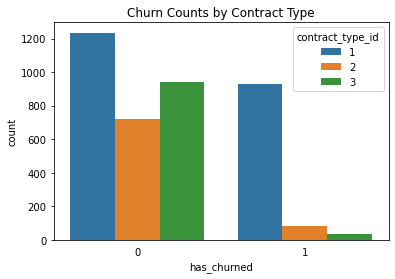

In [76]:
#Graph Churn Counts by Contract Type
churn_counts_by_contract = sns.countplot(x='has_churned', data=train, hue = "contract_type_id").set(title="Churn Counts by Contract Type")
#Remove ticks
plt.tick_params(bottom=False) 

### Hypothesis 2

We can also test for correlation between churn rate and contract type.

$H_0$: There is no significant correlation between customer churn rate and contract type. 

$H_a$: There is a significant correlation between customer churn rate and contract type.

To test this hypothesis, we create the following subgroups.

In [77]:
churn_rate = train.has_churned
contract_type = train.contract_type_id

We will use the Pearson test to determine correlation between these two variables.

In [78]:
corr, p = stats.pearsonr(churn_rate, contract_type)
corr, p

(-0.3961558393959263, 2.572502613430288e-148)

Because our p-value is less than our alpha value ($4.95 \times 10^{-159} < 0.05 $), we reject our null hypothesis that there is no significant correlation between customer churn rate and contract type. 

Please see the graph below Hypothesis 1 for a visualization of this correlation.

### Hypothesis 3

$H_0$: There is no significant correlation between churn rate and payment type ID.

$H_a$: There is a significant correlation between churn rate and payment type ID. 

We can use the Pearson test to test this correlation.

In [79]:
corr, p = stats.pearsonr(churn_rate, train.payment_type_id)
corr, p

(-0.2555831035581517, 7.653586167832065e-60)

Because our p-value is less than our alpha value ($7.65 \times 10^{-60} < 0.05 $), we reject our null hypothesis that there is no significant correlation between churn rate and payment type ID.

We can visualize this correlation with the following Seaborn plot below.

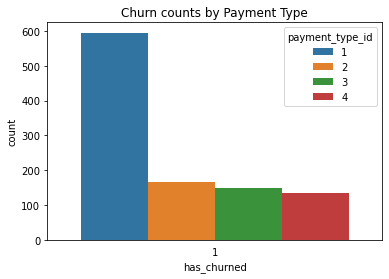

In [80]:
churn_rates_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "payment_type_id").set(title="Churn counts by Payment Type")
#Remove ticks
plt.tick_params(bottom=False) 

It appears from the graph that customers with `payment_type_id==1` are more likely to churn.

### Hypothesis 4

$H_0$: There is no significant correlation between customer churn rate and monthly charges. 

$H_a$: There is a significant correlation between customer churn rate and monthly charges.

Similar to the previous hypothesis testing problem, to test these hypotheses we will need to create the following subgroups.

In [81]:
churn_rate = train.has_churned
monthly_charges = train.monthly_charges

We will use the Pearson test to test for correlation between these two variables. 

In [82]:
corr, p = stats.pearsonr(churn_rate, monthly_charges)
corr, p

(0.18903970957264357, 4.816687112552436e-33)

Because or p-value is less than our alpha value ($4.81 \times 10^{-33} < 0.05 $), we reject teh null hypothesis that there is no significant correlation between customer churn and monthly charges. 

The seaborn plot of the correlation between monthly charges and churn rate is indicated below.

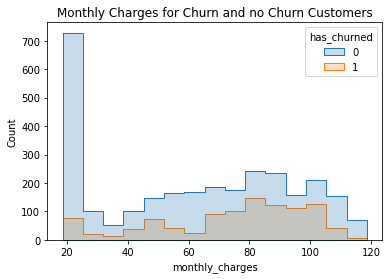

In [83]:
churn_by_monthly_charges = sns.histplot(
    x=train.monthly_charges, hue=train.has_churned, element = 'step'
).set(title="Monthly Charges for Churn and no Churn Customers")

The rate of monthly charges that are more likely to churn is not immediately obvious from the chart. The relationship between monthly charges and churn is worth exploring in our machine learning models later on in this project.

### Hypothesis 5

$H_0$: There is no significant correlation between internet service type ID and churn rate.

$H_a$: There is a significant correlation between internet service type ID and churn rate.

We will use Pearson to test this correlation.

In [84]:
corr, p = stats.pearsonr(churn_rate, train.internet_service_type_id)
corr, p

(-0.043897298986751675, 0.0058350104960837165)

Because our p-value is less than our alpha ($0.0058 < 0.05 $), we reject our null hypothesis that there is no significant correlation between internet service type ID and churn rate.

We visualize this correlation with the graph below.

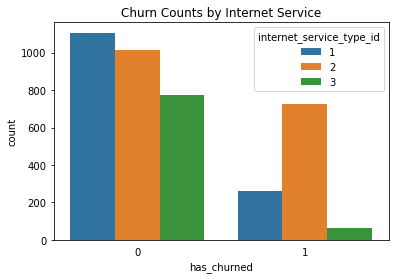

In [85]:
churn_counts_by_internet_service = sns.countplot(x='has_churned', data=train, hue = "internet_service_type_id").set(title="Churn Counts by Internet Service")
#Remove ticks
plt.tick_params(bottom=False) 

It appears from this graph that customers with `internet_service_type_id==2` are more likely to churn.

We can also compare the churn and no churn groups using the Mann Whitney Test. The Mann Whitney tests allows us to test whether or not there is a significant difference in the mean between two groups.

### Hypothesis 6

$H_0$: There is no significant difference between the mean tenure for customers who didn't churn and customers who did churn. 

$H_a$: There is a significant difference between the mean tenure for customers who churned and customers who did churn. 

We must create the following subgroups to test these hypotheses.

In [86]:
train_has_churned = train[train.has_churned == 1]
train_no_churn = train[train.has_churned == 0]

Now we can run the Mann-Whitney test on the `tenure` column of these two groups.

In [87]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

Because our p-value is less than our alpha value ($5.98 \times 10^{-118} < 0.05 $), we reject our null hypothesis that there is no significant difference in mean tenure who customers who churned and customers who didn't churn.

We will now create a graph to see if our conclusion is visible in the data.

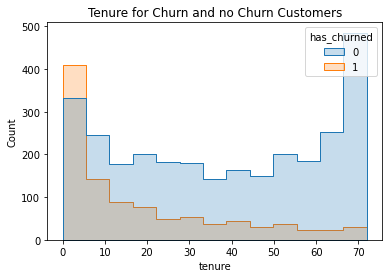

In [88]:
tenure_and_churn = sns.histplot(x=train.tenure, hue=train.has_churned, element = 'step').set(title="Tenure for Churn and no Churn Customers")

It is clearly visible in the graph that customers with less tenure are more likely to churn.

### Hypothesis 7

$H_0$: There is no significant difference in mean monthly charges for customers who have churned and customers who have not churned. 

$H_a$: There is a significant difference in mean monthly charges for customers who have churned and customers who have not churned.

The test we ran in Hypothesis 2 is similar to this hypothesis. We will now determine if the Mann-Whitney test confirms our previous finding.

In [89]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

Because our p-value is less than our alpha value ($1.45 \times 10^{-29} < 0.05 $), we reject our null hypothesis that there is no significant difference in mean monthly charges for customers who churn and customers who do not churn. 

For a graph of the data tested in this hypothesis please see the graph below Hypothesis 3.

### Key takeaways

 - We found that there is a significant difference in churn rate for customers on a month-to-month contract and customers on one year or two year contracts.
 - We found that churn rate is correlated with `contract_type_id`, `payment_type_id`, `monthly_charges`, and `internet_service_type_id`.
 - We found that there is a significant difference in mean `monthly_charges` and `tenure` for customers who churn and customers who don't churn. 
 - Given these findings, I recommend that in our models we explore the relationship between churn and the following features: 
     - `contract_type_id`,
     - `payment_type_id`,
     - `monthly_charges`,
     - `internet_service_type_id`, and 
     - `tenure`.

## Model and Evaluate

### Define X and y train, validate, and test datasets

In [90]:
X_train, y_train = train.drop(columns='has_churned'), train.has_churned
X_validate, y_validate = validate.drop(columns='has_churned'), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

### Baseline Accuracy

Now we will establish a baseline accuracy. 

In [91]:
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [92]:
model = DummyClassifier(strategy= 'constant', constant = 0)
model.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

In [93]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


We will now test the accuracy of several different models with our baseline accuracy in mind. I am going to test the accuracy of the models by creating several classification reports, then printing out each classification report at the end of this section to compare their accuracies.

To run our data through the models, we will need to drop the column `customer_id`.

In [94]:
X_train = X_train.drop(columns = ['customer_id'])
X_validate = X_validate.drop(columns = ['customer_id'])

### Decision Tree

We will start with a decision tree of `max_depth=3`.

In [95]:
#Create model
clf_max_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=123)
#fit the model on train dataset
clf_max_depth_3 = clf_max_depth_3.fit(X_train, y_train)

We can print the decision tree for this model.

In [96]:
#Create graph
dot_data = export_graphviz(clf_max_depth_3, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 
#Render graph
graph.render('telco_tree_1', view=True)

'telco_tree_1.pdf'

**Max Depth 3 Decision Tree**

![title](telco_graph_picture.png)

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type ID one, the biggest predictor of churn is monthly charges less than &#0036;64.43.

Now we will test this model on our train and validate datasets.

In [97]:
#Get predictions for train dataset
y_pred_decision_tree_depth_3_train = clf_max_depth_3.predict(X_train)
#Get predictions for validate dataset
y_pred_decision_tree_depth_3_validate = clf_max_depth_3.predict(X_validate)
#Get classification report for train dataset
report_decision_tree_depth_3_train = pd.DataFrame(classification_report(y_train, y_pred_decision_tree_depth_3_train, output_dict = True)).T
#Get classification report for validate dataset
report_decision_tree_depth_3_validate = pd.DataFrame(classification_report(y_validate, y_pred_decision_tree_depth_3_validate, output_dict = True)).T

Now we will create a DecisionTree with `max_depth=4`.

In [98]:
#Create model
clf_max_depth_4 = DecisionTreeClassifier(max_depth=4, random_state=123)
#Fit the model to train dataset
clf_max_depth_4 = clf_max_depth_4.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_decision_tree_depth_4_train = clf_max_depth_4.predict(X_train)
#Get predictions for validate dataset
y_pred_decision_tree_depth_4_validate = clf_max_depth_4.predict(X_validate)
#Get classification report for train dataset
report_decision_tree_depth_4_train = pd.DataFrame(classification_report(y_train, y_pred_decision_tree_depth_4_train, output_dict = True)).T
#Get classification report for validate dataset
report_decision_tree_depth_4_validate = pd.DataFrame(classification_report(y_validate, y_pred_decision_tree_depth_4_validate, output_dict = True)).T

Now we will look at a DecisionTree with `max_depth=5`.

In [99]:
#Create model
clf_max_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=123)
#Fit the model to train dataset
clf_max_depth_5 = clf_max_depth_5.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_decision_tree_depth_5_train = clf_max_depth_5.predict(X_train)
#Get predictions for validate dataset
y_pred_decision_tree_depth_5_validate = clf_max_depth_5.predict(X_validate)
#Get classification report for train dataset
report_decision_tree_depth_5_train = pd.DataFrame(classification_report(y_train, y_pred_decision_tree_depth_5_train, output_dict = True)).T
#Get classification report for validate dataset
report_decision_tree_depth_5_validate = pd.DataFrame(classification_report(y_validate, y_pred_decision_tree_depth_5_validate, output_dict = True)).T

### Random Forest

We will first look at the `RandomForest` model with `max_depth=10` and `min_samples_leaf=1`

In [100]:
#Create model
rf_depth_10_leaf_1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
#Fit the model on train dataset
rf_depth_10_leaf_1.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_rf_depth_10_leaf_1_train = rf_depth_10_leaf_1.predict(X_train)
#Get predictions for validate dataset
y_pred_rf_depth_10_leaf_1_validate = rf_depth_10_leaf_1.predict(X_validate)
#Get classification report for train dataset
report_rf_depth_10_leaf_1_train = pd.DataFrame(classification_report(y_train, y_pred_rf_depth_10_leaf_1_train, output_dict = True)).T
#Get classification report for validate dataset
report_rf_depth_10_leaf_1_validate = pd.DataFrame(classification_report(y_validate, y_pred_rf_depth_10_leaf_1_validate, output_dict = True)).T

We will now look at the `RandomForest` model with `max_depth=3` and `min_samples_leaf=1`.

In [101]:
#Create model
rf_depth_3_leaf_1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
#Fit the model on train dataset
rf_depth_3_leaf_1.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_rf_depth_3_leaf_1_train = rf_depth_3_leaf_1.predict(X_train)
#Get predictions for validate dataset
y_pred_rf_depth_3_leaf_1_validate = rf_depth_3_leaf_1.predict(X_validate)
#Get classification report for train dataset
report_rf_depth_3_leaf_1_train = pd.DataFrame(classification_report(y_train, y_pred_rf_depth_3_leaf_1_train, output_dict = True)).T
#Get classification report for validate dataset
report_rf_depth_3_leaf_1_validate = pd.DataFrame(classification_report(y_validate, y_pred_rf_depth_3_leaf_1_validate, output_dict = True)).T

We will now look at the `RandomForest` model with `max_depth=10` and `min_samples_leaf=3`.

In [102]:
#Create model
rf_depth_10_leaf_3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
#Fit the model on train dataset
rf_depth_10_leaf_3.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_rf_depth_10_leaf_3_train = rf_depth_10_leaf_3.predict(X_train)
#Get predictions for validate dataset
y_pred_rf_depth_10_leaf_3_validate = rf_depth_10_leaf_3.predict(X_validate)
#Get classification report for train dataset
report_rf_depth_10_leaf_3_train = pd.DataFrame(classification_report(y_train, y_pred_rf_depth_10_leaf_3_train, output_dict = True)).T
#Get classification report for validate dataset
report_rf_depth_10_leaf_3_validate = pd.DataFrame(classification_report(y_validate, y_pred_rf_depth_10_leaf_3_validate, output_dict = True)).T

### K Nearest Neighbor

We will start by setting `n_neighbors=5`.

In [103]:
#Create model
knn_5_neighbors = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#Fit model to train dataset
knn_5_neighbors.fit(X_train, y_train)
#Get predictions for train data
y_pred_5_neighbors_train = knn_5_neighbors.predict(X_train)
#Get predictions for validate dataset
y_pred_5_neighbors_validate = knn_5_neighbors.predict(X_validate)
#Create classification report for train dataset
report_knn_5_neighbors_train = pd.DataFrame(classification_report(y_train, y_pred_5_neighbors_train, output_dict = True)).T
#Create classification report for validate dataset
report_knn_5_neighbors_validate = pd.DataFrame(classification_report(y_validate, y_pred_5_neighbors_validate, output_dict = True)).T

We will now test the model by setting `n_neighbors=10`.

In [104]:
#Create model
knn_10_neighbors = KNeighborsClassifier(n_neighbors=10, weights='uniform')
#Fit model to train dataset
knn_10_neighbors.fit(X_train, y_train)
#Get predictions for train data
y_pred_10_neighbors_train = knn_10_neighbors.predict(X_train)
#Get predictions for validate dataset
y_pred_10_neighbors_validate = knn_10_neighbors.predict(X_validate)
#Create classification report for train dataset
report_knn_10_neighbors_train = pd.DataFrame(classification_report(y_train, y_pred_10_neighbors_train, output_dict = True)).T
#Create classification report for validate dataset
report_knn_10_neighbors_validate = pd.DataFrame(classification_report(y_validate, y_pred_10_neighbors_validate, output_dict = True)).T

We will now test the model by setting `n_neighbors=7`.

In [105]:
#Create model
knn_7_neighbors = KNeighborsClassifier(n_neighbors=7, weights='uniform')
#Fit model to train dataset
knn_7_neighbors.fit(X_train, y_train)
#Get predictions for train dataset
y_pred_7_neighbors_train = knn_7_neighbors.predict(X_train)
#Get predictions for validate dataset
y_pred_7_neighbors_validate = knn_7_neighbors.predict(X_validate)
#Get classification report for train dataset
report_knn_7_neighbors_train = pd.DataFrame(classification_report(y_train, y_pred_7_neighbors_train, output_dict = True)).T
#Get classification report for validate dataset
report_knn_7_neighbors_validate = pd.DataFrame(classification_report(y_validate, y_pred_7_neighbors_validate, output_dict = True)).T

### Comparing Models

We will now print out the classification report for each model to compare the accuracy, precision, and recall of each model.

#### DecisionTree max depth 3

In [106]:
display_side_by_side(report_decision_tree_depth_3_train, report_decision_tree_depth_3_validate)

,precision,recall,f1-score,support
0,0.791324,0.963410,0.868929,2897.000000
1,0.745192,0.296367,0.424077,1046.000000
accuracy,0.786457,0.786457,0.786457,0.786457
macro avg,0.768258,0.629889,0.646503,3943.000000
weighted avg,0.779086,0.786457,0.750918,3943.000000
,precision,recall,f1-score,support
0,0.790312,0.958937,0.866497,1242.000000
1,0.722826,0.296214,0.420221,449.000000
accuracy,0.782969,0.782969,0.782969,0.782969
macro avg,0.756569,0.627576,0.643359,1691.000000


#### DecisionTree max depth 4

In [107]:
display_side_by_side(report_decision_tree_depth_4_train, report_decision_tree_depth_4_validate)

,precision,recall,f1-score,support
0,0.812954,0.927166,0.866312,2897.000000
1,0.669797,0.409178,0.508012,1046.000000
accuracy,0.789754,0.789754,0.789754,0.789754
macro avg,0.741375,0.668172,0.687162,3943.000000
weighted avg,0.774977,0.789754,0.771262,3943.000000
,precision,recall,f1-score,support
0,0.809834,0.901771,0.853333,1242.000000
1,0.603896,0.414254,0.491413,449.000000
accuracy,0.772324,0.772324,0.772324,0.772324
macro avg,0.706865,0.658013,0.672373,1691.000000


#### DecsionTree max depth 5

In [108]:
display_side_by_side(report_decision_tree_depth_5_train, report_decision_tree_depth_5_validate)

,precision,recall,f1-score,support
0,0.843915,0.880911,0.862017,2897.000000
1,0.624592,0.548757,0.584224,1046.000000
accuracy,0.792797,0.792797,0.792797,0.792797
macro avg,0.734254,0.714834,0.723120,3943.000000
weighted avg,0.785733,0.792797,0.788324,3943.000000
,precision,recall,f1-score,support
0,0.836874,0.888084,0.861719,1242.000000
1,0.627346,0.521158,0.569343,449.000000
accuracy,0.790656,0.790656,0.790656,0.790656
macro avg,0.732110,0.704621,0.715531,1691.000000


#### RandomForest max depth 10, min samples leaf 1

In [109]:
display_side_by_side(report_rf_depth_10_leaf_1_train, report_rf_depth_10_leaf_1_validate)

,precision,recall,f1-score,support
0,0.908227,0.956507,0.931742,2897.000000
1,0.858744,0.732314,0.790506,1046.000000
accuracy,0.897033,0.897033,0.897033,0.897033
macro avg,0.883486,0.844410,0.861124,3943.000000
weighted avg,0.895100,0.897033,0.894275,3943.000000
,precision,recall,f1-score,support
0,0.838444,0.902576,0.869329,1242.00000
1,0.658192,0.518931,0.580324,449.00000
accuracy,0.800710,0.800710,0.800710,0.80071
macro avg,0.748318,0.710754,0.724826,1691.00000


#### RandomForest max depth 3, min samples leaf 1

In [110]:
display_side_by_side(report_rf_depth_3_leaf_1_train, report_rf_depth_3_leaf_1_validate)

,precision,recall,f1-score,support
0,0.797578,0.954781,0.869128,2897.00000
1,0.724211,0.328872,0.452334,1046.00000
accuracy,0.788740,0.788740,0.788740,0.78874
macro avg,0.760894,0.641826,0.660731,3943.00000
weighted avg,0.778115,0.788740,0.758561,3943.00000
,precision,recall,f1-score,support
0,0.799729,0.951691,0.869118,1242.000000
1,0.718310,0.340757,0.462236,449.000000
accuracy,0.789474,0.789474,0.789474,0.789474
macro avg,0.759020,0.646224,0.665677,1691.000000


#### RandomForest, maxdepth 10, min samples leaf 3

In [111]:
display_side_by_side(report_rf_depth_10_leaf_3_train, report_rf_depth_10_leaf_3_validate)

,precision,recall,f1-score,support
0,0.879987,0.944080,0.910908,2897.000000
1,0.805988,0.643403,0.715577,1046.000000
accuracy,0.864317,0.864317,0.864317,0.864317
macro avg,0.842988,0.793742,0.813242,3943.000000
weighted avg,0.860357,0.864317,0.859090,3943.000000
,precision,recall,f1-score,support
0,0.839072,0.902576,0.869666,1242.000000
1,0.659155,0.521158,0.582090,449.000000
accuracy,0.801301,0.801301,0.801301,0.801301
macro avg,0.749113,0.711867,0.725878,1691.000000


#### K Nearest Neighbor, 5 neighbors

In [112]:
display_side_by_side(report_knn_5_neighbors_train, report_knn_5_neighbors_validate)

,precision,recall,f1-score,support
0,0.857143,0.925785,0.890143,2897.000000
1,0.735872,0.572658,0.644086,1046.000000
accuracy,0.832108,0.832108,0.832108,0.832108
macro avg,0.796508,0.749222,0.767114,3943.000000
weighted avg,0.824972,0.832108,0.824869,3943.000000
,precision,recall,f1-score,support
0,0.817352,0.864734,0.840376,1242.000000
1,0.554377,0.465479,0.506053,449.000000
accuracy,0.758723,0.758723,0.758723,0.758723
macro avg,0.685864,0.665107,0.673214,1691.000000


#### K Nearest Neighbor, 10 neighbors

In [113]:
display_side_by_side(report_knn_10_neighbors_train, report_knn_10_neighbors_validate)

,precision,recall,f1-score,support
0,0.819833,0.950293,0.880256,2897.000000
1,0.753846,0.421606,0.540773,1046.000000
accuracy,0.810043,0.810043,0.810043,0.810043
macro avg,0.786840,0.685950,0.710514,3943.000000
weighted avg,0.802328,0.810043,0.790198,3943.000000
,precision,recall,f1-score,support
0,0.800414,0.933172,0.861710,1242.000000
1,0.658436,0.356347,0.462428,449.000000
accuracy,0.780012,0.780012,0.780012,0.780012
macro avg,0.729425,0.644760,0.662069,1691.000000


#### K Nearest Neighbor, 7 neighbors

In [114]:
display_side_by_side(report_knn_7_neighbors_train, report_knn_7_neighbors_validate)

,precision,recall,f1-score,support
0,0.845190,0.930963,0.886005,2897.000000
1,0.734043,0.527725,0.614016,1046.000000
accuracy,0.823992,0.823992,0.823992,0.823992
macro avg,0.789616,0.729344,0.750010,3943.000000
weighted avg,0.815704,0.823992,0.813852,3943.000000
,precision,recall,f1-score,support
0,0.811669,0.884863,0.846687,1242.000000
1,0.575668,0.432071,0.493639,449.000000
accuracy,0.764636,0.764636,0.764636,0.764636
macro avg,0.693668,0.658467,0.670163,1691.000000


### Key Takeaways

All these models have accuracy greater than baseline accuracy of $0.73$. Thus, all the models are valid.

Comparing each of these models, I select the `RandomForest` with `max_depth=10` and `min_samples_leaf=1`. My selection is based on the following criteria:
 - This model has a higher accuracy than our baseline of $0.73$, so it is valid. 
 - This model has the a recall score for the train and validate datasets, while still maintaining high accuracy and precision.

In my opinion, the recall score is the most important score in this situation. We want to make sure we are capturing all churning customers. It is better to overestimate than to underestimate churn rate. In other words, it is better to overprepare for the worst possible scenario than to underestimate the problem and underprepare.

Although `RandomForest` `max_depth=3` and `min_samples_leaf=1` has the highest overall recall score, we sacrifice accuracy and precision by using this model. Thus, `RandomForest` with `max_depth=10` and `min_samples_leaf=1` is overall the most effective model.

### Feature importance

We can use our selected model to calculate feature importances.

In [115]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf_depth_10_leaf_1.feature_importances_, index = X_train.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']
#Display DataFrame
feature_importances

category,relative importance
total_charges,0.169107
tenure,0.165327
monthly_charges,0.130737
contract_type_id,0.126100
payment_type_id,0.077776
internet_service_type_id,0.038534
tech_support_Yes,0.031048
online_security_Yes,0.029296
paperless_billing_numeric,0.024660
multiple_lines_Yes,0.019738


We can graph our feature importances below.

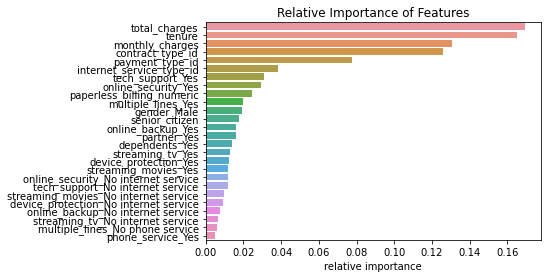

In [116]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index).set(title="Relative Importance of Features")

Furthermore, we can zoom in on the most important variables.

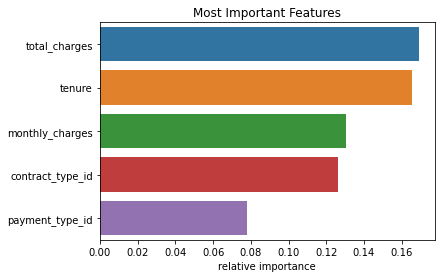

In [120]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5]).set(title="Most Important Features")

#### Key takeaways

This model confirms what we have previously seen in our hypothesis testing and our DecisionTree. The features `total_charges`, `tenure`, `monthly_charges`, `contract_type_id`, and `payment_type_id` are highly predictive of churn.

### Testing my best model

To run the model on the test dataset, we will need to drop the column `customer_id`.

In [38]:
X_test_no_id = X_test.drop(columns = ['customer_id'])

Now we can run our `RandomForest` model with `max_depth=0` and `min_samples_leaf=1` on our test dataset.

In [40]:
#Get predictions for test dataset
y_pred_rf_depth_10_leaf_1_test = rf_depth_10_leaf_1.predict(X_test_no_id)
#Create a classification report for test dataset
classification_report_test = pd.DataFrame(classification_report(y_test, y_pred_rf_depth_10_leaf_1_test, output_dict = True)).T
#Display classification report
classification_report_test

,precision,recall,f1-score,support
0,0.853726,0.896618,0.874647,1035.000000
1,0.667702,0.574866,0.617816,374.000000
accuracy,0.811214,0.811214,0.811214,0.811214
macro avg,0.760714,0.735742,0.746231,1409.000000
weighted avg,0.804348,0.811214,0.806474,1409.000000


The accuracy is still higher than our baseline accuracy of $0.73$.

### Create a Predictions CSV file

First we will calculate the probabilities for each item in the test dataset.

In [44]:
#Get probability of churn for each row in the test dataset
proba_test = rf_depth_10_leaf_1.predict_proba(X_test_no_id)
#Convert probabilities into a DataFrame
proba_df = pd.DataFrame(proba_test, columns=rf_depth_10_leaf_1.classes_.tolist())
#Display the DataFrame
proba_df.head()

,0,1
0,0.948333,0.051667
1,0.688388,0.311612
2,0.730716,0.269284
3,0.696324,0.303676
4,0.479042,0.520958


Now we will create a new index for the tests dataset.

In [45]:
#Create new index for the test data DataFrame
reset_test = X_test.reset_index()
#Display new DataFrame
reset_test.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,2789,8670-ERCJH,0,72,2,3,3,113.40,8164.10,0,...,0,1,0,1,0,1,0,1,0,1
1,1233,0356-ERHVT,0,11,1,1,3,45.90,521.90,1,...,0,0,0,0,0,0,0,0,0,0
2,6784,4786-UKSNZ,0,1,3,1,2,20.20,20.20,0,...,1,0,1,0,1,0,1,0,1,0
3,3177,5945-AZYHT,0,71,2,2,1,109.60,7854.15,1,...,0,1,0,1,0,0,0,1,0,1
4,1740,4432-ADRLB,0,2,1,1,2,44.65,74.90,0,...,0,0,0,0,0,0,0,0,0,0


We concatenate our new `X_test` DataFrame with our probabilities DataFrame.

In [46]:
#Concatenate the test data DataFrame with the probabilities DataFrame
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
#Display new DataFrame
test_proba_df.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,0,1
0,2789,8670-ERCJH,0,72,2,3,3,113.40,8164.10,0,...,0,1,0,1,0,1,0,1,0.948333,0.051667
1,1233,0356-ERHVT,0,11,1,1,3,45.90,521.90,1,...,0,0,0,0,0,0,0,0,0.688388,0.311612
2,6784,4786-UKSNZ,0,1,3,1,2,20.20,20.20,0,...,1,0,1,0,1,0,1,0,0.730716,0.269284
3,3177,5945-AZYHT,0,71,2,2,1,109.60,7854.15,1,...,0,1,0,0,0,1,0,1,0.696324,0.303676
4,1740,4432-ADRLB,0,2,1,1,2,44.65,74.90,0,...,0,0,0,0,0,0,0,0,0.479042,0.520958


We create a new column with the predicted value.

In [48]:
#Create a new column with the predicted result
test_proba_df['predicted'] = y_pred_rf_depth_10_leaf_1_test 
#Display DataFrame
test_proba_df.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,0,1,predicted
0,2789,8670-ERCJH,0,72,2,3,3,113.40,8164.10,0,...,1,0,1,0,1,0,1,0.948333,0.051667,0
1,1233,0356-ERHVT,0,11,1,1,3,45.90,521.90,1,...,0,0,0,0,0,0,0,0.688388,0.311612,0
2,6784,4786-UKSNZ,0,1,3,1,2,20.20,20.20,0,...,0,1,0,1,0,1,0,0.730716,0.269284,0
3,3177,5945-AZYHT,0,71,2,2,1,109.60,7854.15,1,...,1,0,0,0,1,0,1,0.696324,0.303676,0
4,1740,4432-ADRLB,0,2,1,1,2,44.65,74.90,0,...,0,0,0,0,0,0,0,0.479042,0.520958,1


We will now write a CSV file with just the predicitons. First, we create the DataFrame that we will convert into a CSV file.

In [50]:
#Create new DataFrame that we will convert into a CSV file.
csv_df = test_proba_df[["customer_id", 0, 1, 'predicted']]
#Display DataFrame
csv_df.head()

,customer_id,0,1,predicted
0,8670-ERCJH,0.948333,0.051667,0
1,0356-ERHVT,0.688388,0.311612,0
2,4786-UKSNZ,0.730716,0.269284,0
3,5945-AZYHT,0.696324,0.303676,0
4,4432-ADRLB,0.479042,0.520958,1


We will now write our DataFrame to a CSV file.

In [51]:
csv_df.to_csv('predictions.csv')

I am also creating another CSV file that includes relevant variables.

In [53]:
csv_with_relevant_variables = test_proba_df[["customer_id", "contract_type_id", "monthly_charges", "tenure", 0, 1, 'predicted']]

In [55]:
csv_with_relevant_variables.to_csv('predictions_with_features.csv')

## Conclusion

We learned from hypothesis testing, the DecisionTree model, and the RandomForest model that the variables `total_charges`, `tenure`, `monthly_charges`, `contract_type_id` are highly correlated with churn. 

We know that customers on a month-to-month contract are more likely to churn. Our DecisionTree indicated to us, that of these month-to-month customers, two additional factors predicted churn: 
   - monthly charges less than &#0036;68.42.
   - tenure of 5 months or less. 
   
Therefore, I recommend limiting the month-to-month contract to customers who meet either of the following criteria:
   - monthly charges greater than &#0036;68.42.
   - six months or greater of tenure. 
   
Following my recommendation would decrease churn significantly among the customers most likely to churn, highly increasing our company's revenues.   
   
With more time, I would like to explore additional ways the key variables mentioned above are correlated with churn. We can adjust the contract requirements to make customers less likely to churn. 

[](pexels-photo-669619.jpeg)

![title](pexels-lukas-669619.jpg)

[Source Photo 3](https://www.pexels.com/photo/macbook-pro-beside-papers-669619/) 